<a href="https://colab.research.google.com/github/Alanmc021/Perceptron-non-LINEAR-regression/blob/main/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão

A aplicação de redes neurais em problemas de regressão tem sido um campo promissor na inteligência artificial. Neste estudo de caso, focaremos na implementação de uma rede neural de regressão com apenas dois neurônios, utilizando o modelo de Perceptron, no ambiente do Google Colab.

Ao optarmos por uma arquitetura neural mínima, composta por dois neurônios, buscamos simplificar o entendimento dos conceitos fundamentais envolvidos no treinamento de redes neurais. A escolha do Google Colab como plataforma não apenas oferece uma infraestrutura poderosa para execução de código Python, mas também facilita a colaboração e compartilhamento de conhecimento.

Iniciaremos com a importação das bibliotecas necessárias e explicaremos a estrutura básica do Perceptron, destacando a função de ativação. Ao longo do estudo, abordaremos o processo de treinamento, com ênfase no algoritmo de retropropagação, e discutiremos métodos de avaliação de desempenho. A escolha deliberada de uma arquitetura enxuta visa proporcionar uma experiência acessível e didática, permitindo que os participantes compreendam os princípios essenciais na construção de redes neurais para tarefas de regressão no ambiente colaborativo do Google Colab.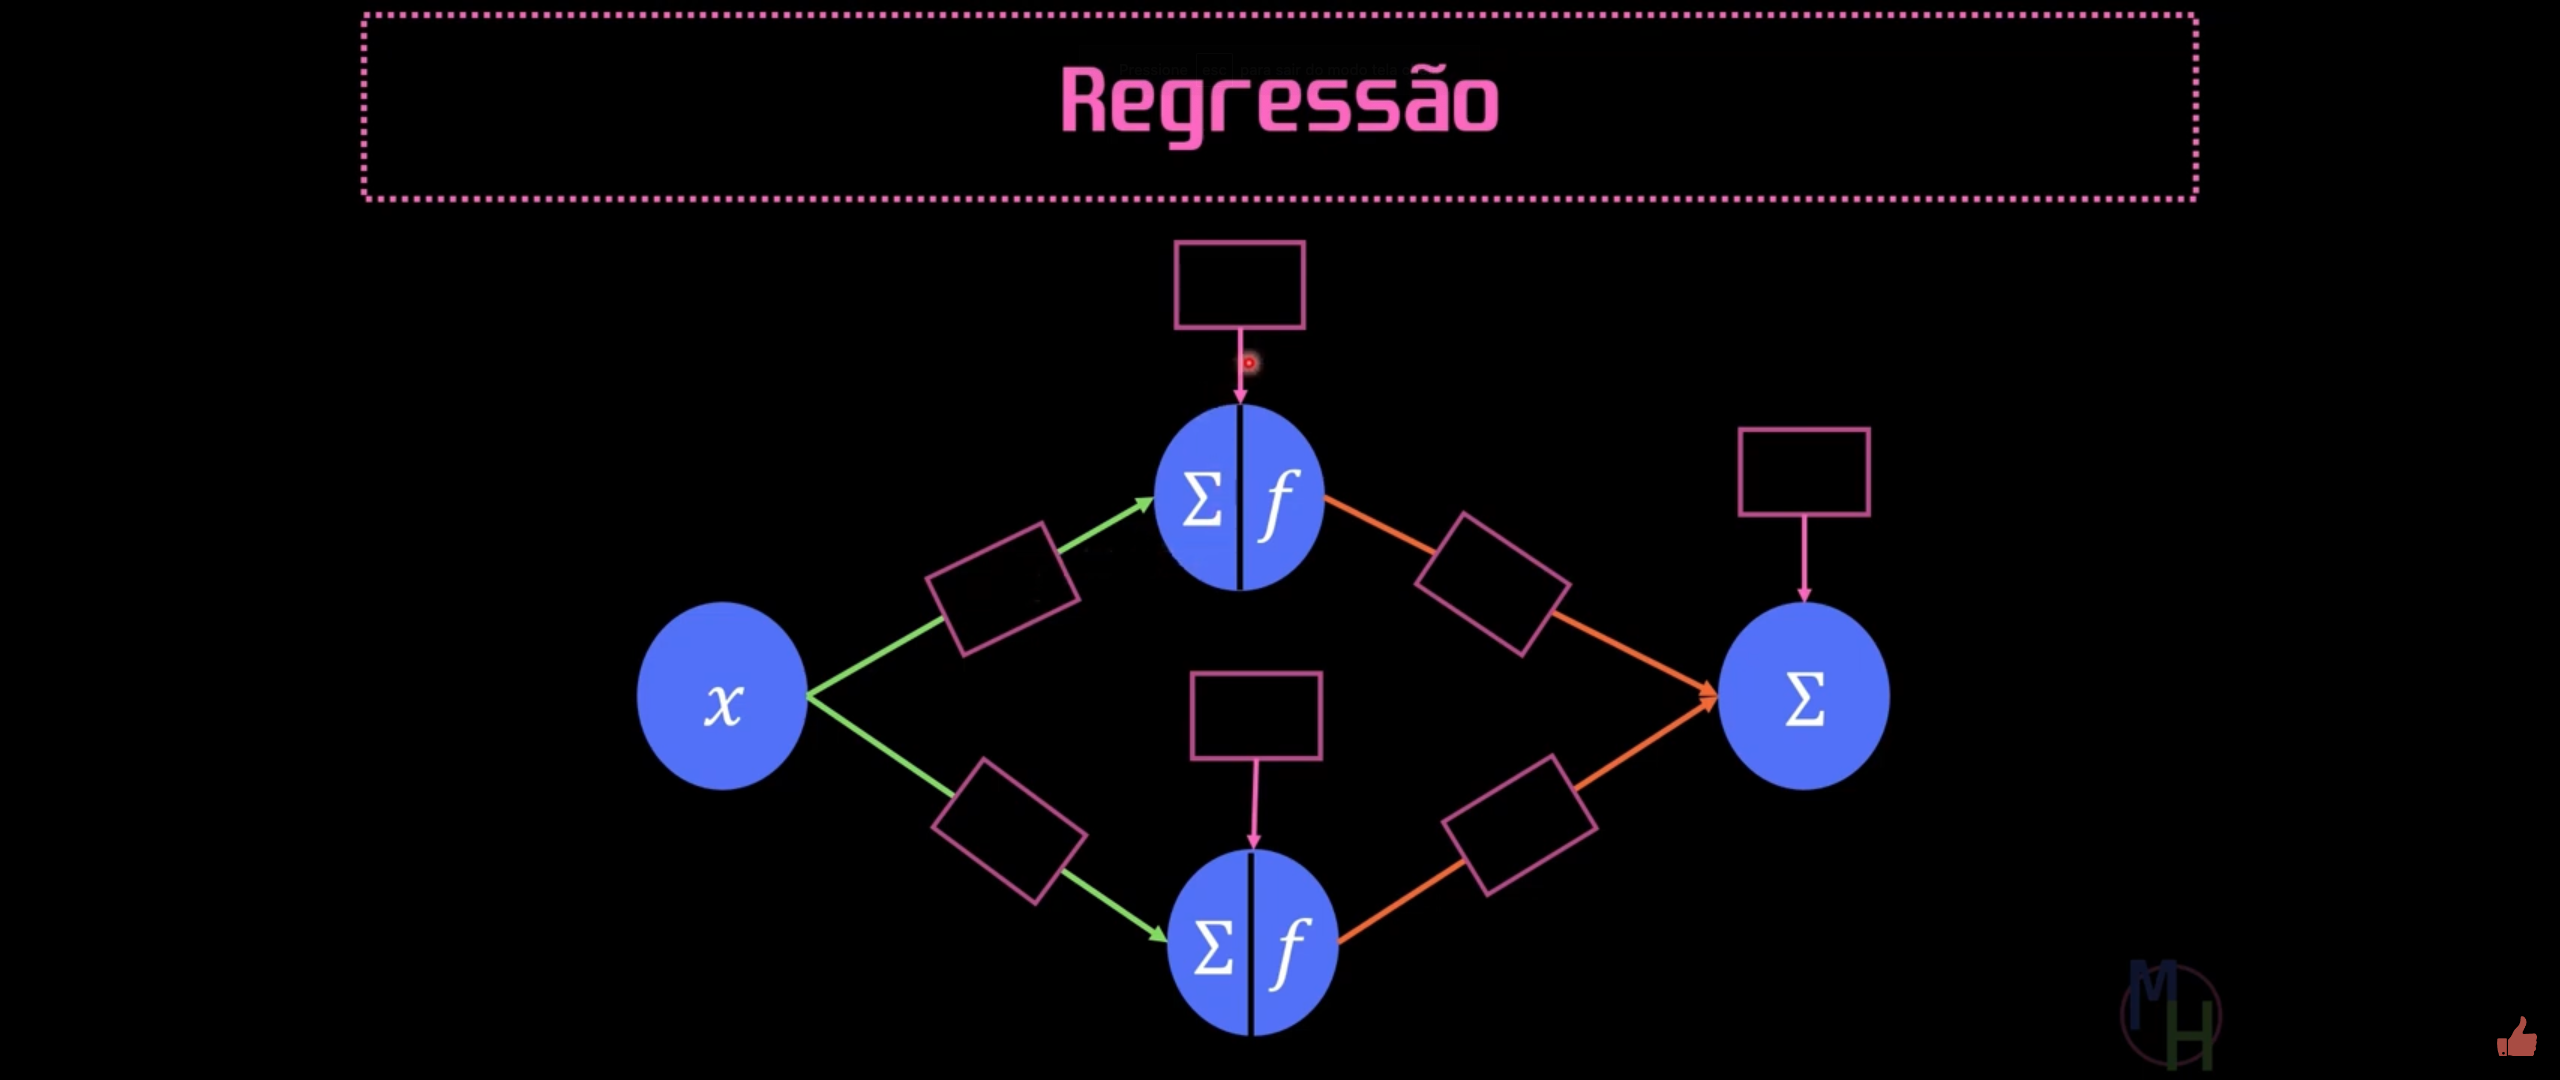

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.core.multiarray import ndarray
import pandas as pd
import torch
import torch.nn as nn

In [11]:
##Parâmetros de visualização personalizados##
colors={'rosa':'#ff66c4','azul':'#5271ff','verde':'#7ED957', 'laranja':'#f6672a'}
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15
bbox = dict(boxstyle="round", alpha=0.7, color=colors['rosa'])

# FUNÇÃO DE ATIVAÇÃO SIGMOILD

In [12]:
def ativacao_sigmoid(x: float) -> float:
  """
  Retorna a função sigmoid de x
  """
  return (1/(1+np.e**(-x)))

In [13]:
def parabola(x: ndarray) -> ndarray:
  ruido = np.random.randn(x.shape[0])/60
  return 2*((x-0.3)**2 -0.45*x+0.3) + ruido

Text(0.5, 1.0, 'Valor do seguro em função da idade (valores normalizados)')

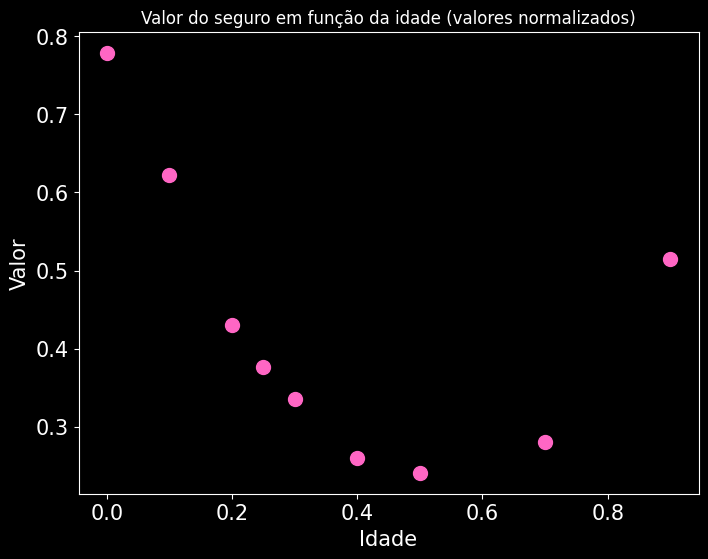

In [14]:
# Cria o dataset de exemplo

idade = np.array([0, 0.1,0.2,0.25,0.3,0.4,0.5,0.7,0.9])
valor = parabola(idade)
plt.scatter(idade,valor, s=100,color = colors['rosa'])
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade (valores normalizados)', fontdict={'size':12})

In [45]:
df = pd.DataFrame({'idade':idade, 'valor': valor})
df

,idade,valor
0,0.00,0.778841
1,0.10,0.622955
2,0.20,0.430391
3,0.25,0.376952
4,0.30,0.335828
5,0.40,0.259567
6,0.50,0.241321
7,0.70,0.281150
8,0.90,0.514272


In [16]:
# Prepara os arrays em tensores para o pytorch

x = torch.FloatTensor([df.idade.values.astype(float)])
y = torch.FloatTensor(df.valor.values.astype(float))
x = x.view(x.size(1), -1)
y = y.unsqueeze(1)

<ipython-input-16-557de30f834c>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  x = torch.FloatTensor([df.idade.values.astype(float)])


In [17]:
class Model(nn.Module):

  def __init__(self,hidden_neurons=2):
    super().__init__()
    self.hidden_neurons = hidden_neurons
    self.input_layer = nn.Linear(in_features=1, out_features=self.hidden_neurons, bias=True)
    self.output_layer = nn.Linear(in_features=2,out_features=1)
    self.activation = nn.Sigmoid()


  def forward(self,x):
    out = self.input_layer(x)
    out = self.activation(out)
    out = self.output_layer(out)
    return out

In [19]:
EPOCHS = 1000
LR = 0.1

In [20]:
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=LR)

In [46]:
# Guarda os valores de pesos e bias para fazer os gráficos

weights = []
bias = []

# Realiza o treinamento

for epoch in range(EPOCHS):

  outputs = model.forward(x)

  loss = criterion(outputs,y)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  weights.append(model.input_layer.weight)
  bias.append(model.input_layer.bias)
out = outputs

In [22]:
print(f'Camada de Entrada:')
print(f'Pesos: {model.input_layer.weight.view(-1).numpy(force=True)}\nBias: {model.input_layer.bias.numpy(force=True)}')

Camada de Entrada:
Pesos: [-8.156694 -2.295645]
Bias: [1.2519612 0.6907214]


In [23]:
print(f'Camada escondida:')
print(f'Pesos: {model.output_layer.weight.view(-1).numpy(force=True)}\nBias: {model.output_layer.bias.numpy(force=True)}')

Camada escondida:
Pesos: [ 1.2996292 -1.495544 ]
Bias: [0.7573268]


In [27]:
def tensor_to_numpy(tensor: torch.tensor):
  """
  Convert os tensores em numpy para fazer os gráficos
  """
  return tensor.view(-1).numpy(force=True)

In [47]:
x_range = torch.FloatTensor(np.arange(0,1.0,0.02))

#Primeiro neuronio

In [28]:
# Tensores
# x_range é criado para obter mais pontos e um gráfico suave
x_range = torch.arange(x.min(), x.max(), 0.01)
y1 = x_range*model.input_layer.weight[0][0] + model.input_layer.bias[0]
sigmoid1 = 1/(1 + torch.exp(-y1))
saida1 = sigmoid1*model.output_layer.weight[0][0]

In [29]:
# Numpy arrays
y1_numpy = tensor_to_numpy(y1)
sigmoid1_numpy = tensor_to_numpy(sigmoid1)
saida1_numpy = tensor_to_numpy(saida1)

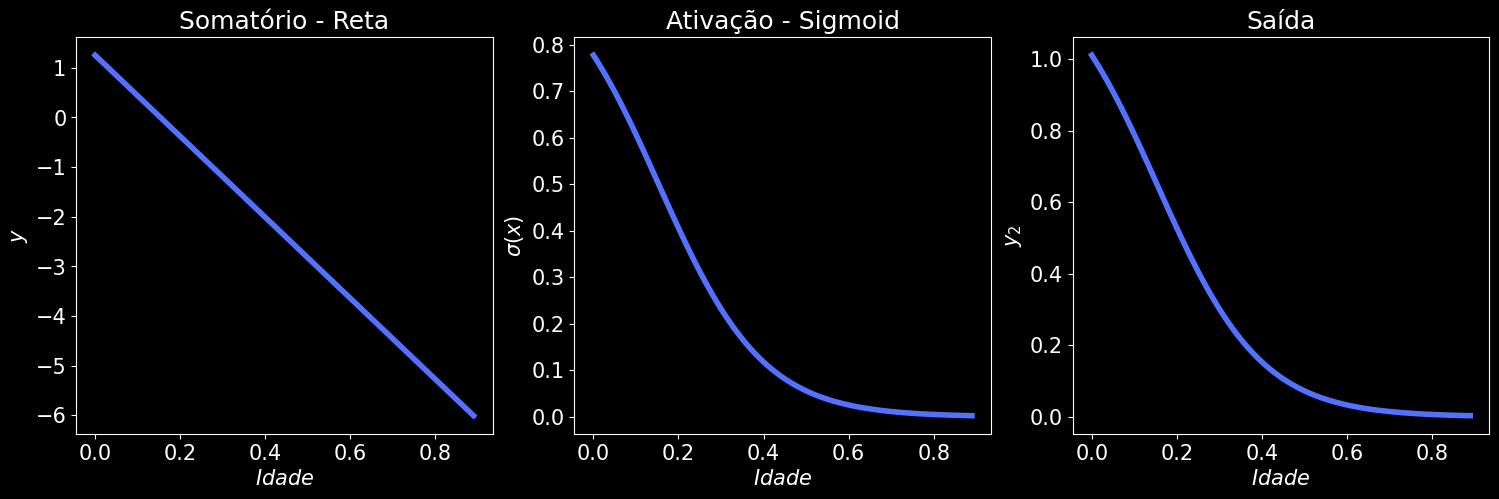

In [30]:
fig, ax = plt.subplots(nrows= 1, ncols = 3, figsize=(15,5))

# Somatório - Perceptron
ax[0].plot(x_range, y1_numpy, lw=4, color=colors['azul'])
ax[0].set_xlabel(r'$Idade$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Somatório - Reta')

# Ativação - Sigmoid
ax[1].plot(x_range, sigmoid1_numpy, lw=4, color=colors['azul'])
ax[1].set_xlabel(r'$Idade$')
ax[1].set_ylabel(r'$\sigma(x)$')
ax[1].set_title('Ativação - Sigmoid')

# Após peso w2 - Entrada para o neuronio de saída
ax[2].plot(x_range, saida1_numpy, lw=4, color=colors['azul'])
ax[2].set_xlabel(r'$Idade$')
ax[2].set_ylabel(r'$y_2$')
ax[2].set_title('Saída')

plt.tight_layout(pad=0.5)

#Segundo neuronio

In [34]:
y2 = x_range*model.input_layer.weight[1][0] + model.input_layer.bias[1]
sigmoid2 = 1/(1 + torch.exp(-y2))
saida2 = sigmoid2*model.output_layer.weight[0][1]

In [35]:
y2_numpy = tensor_to_numpy(y2)
sigmoid2_numpy = tensor_to_numpy(sigmoid2)
saida2_numpy = tensor_to_numpy(saida2)

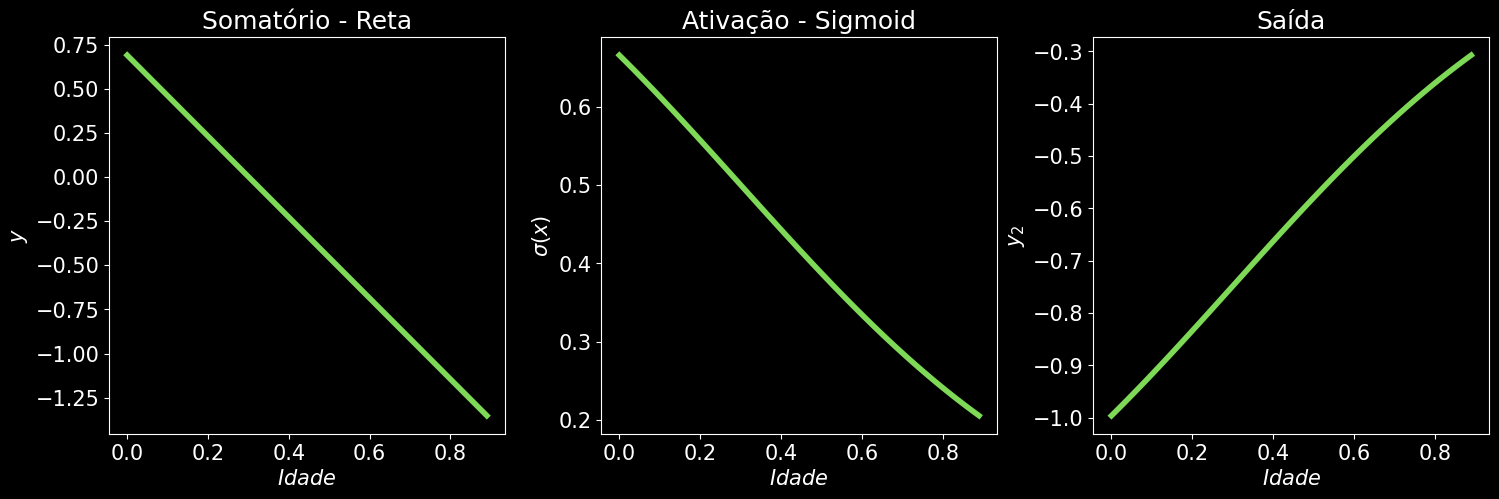

In [36]:
fig, ax = plt.subplots(nrows= 1, ncols = 3, figsize=(15,5))

# Somatório - Perceptron
ax[0].plot(x_range, y2_numpy, lw=4, color=colors['verde'])
ax[0].set_xlabel(r'$Idade$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Somatório - Reta')

# Ativação - Sigmoid
ax[1].plot(x_range, sigmoid2_numpy, lw=4, color=colors['verde'])
ax[1].set_xlabel(r'$Idade$')
ax[1].set_ylabel(r'$\sigma(x)$')
ax[1].set_title('Ativação - Sigmoid')

# Após peso w2 - Entrada para o neuronio de saída
ax[2].plot(x_range, saida2_numpy, lw=4, color=colors['verde'])
ax[2].set_xlabel(r'$Idade$')
ax[2].set_ylabel(r'$y_2$')
ax[2].set_title('Saída')

plt.tight_layout(pad=0.5)

#Saída

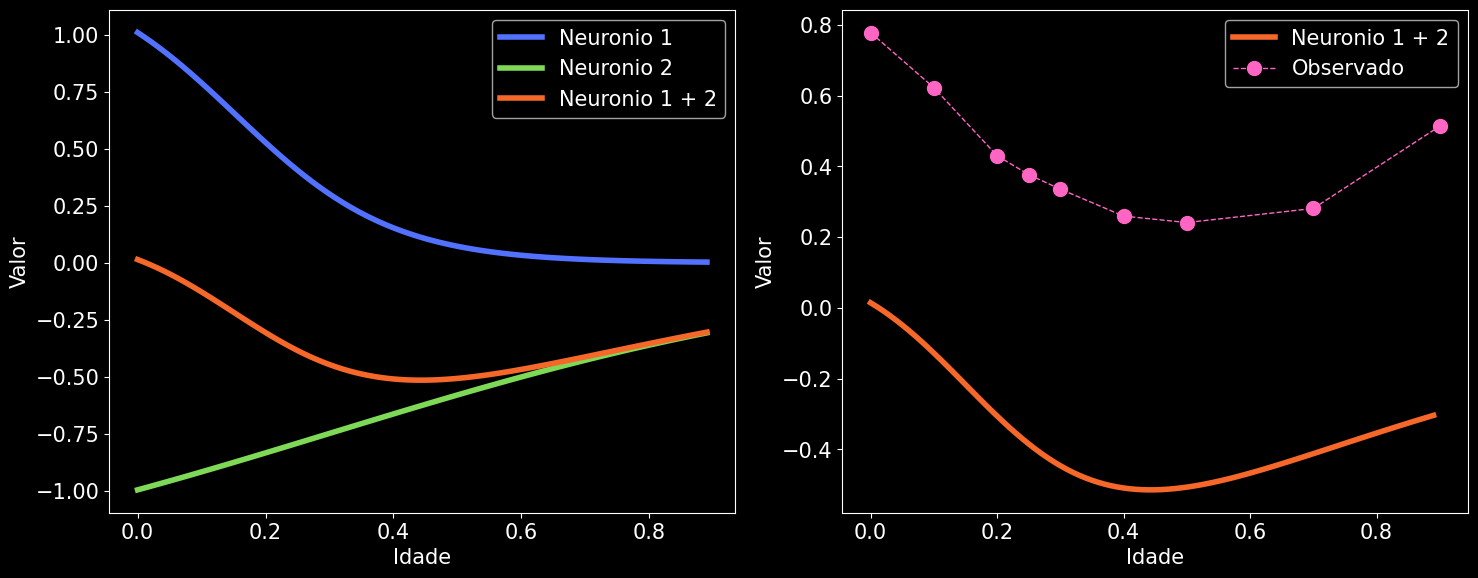

In [37]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(x_range, saida1_numpy, lw=4, color=colors['azul'], label = 'Neuronio 1')
ax[0].plot(x_range, saida2_numpy,lw=4, color=colors['verde'], label = 'Neuronio 2')
ax[0].plot(x_range, saida1_numpy + saida2_numpy, lw=4, color=colors['laranja'], label = 'Neuronio 1 + 2')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Valor')
ax[0].legend()

ax[1].plot(x_range, saida1_numpy + saida2_numpy, lw=4, color=colors['laranja'], label = 'Neuronio 1 + 2')
ax[1].plot(x, y, linestyle = 'dashed', color=colors['rosa'], lw=1, marker='o', markerfacecolor=colors['rosa'], markersize=10, label = 'Observado')
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Valor')
ax[1].legend()

plt.tight_layout(pad=1)

In [38]:
saida = saida1 + saida2  + model.output_layer.bias[0]
saida_numpy = tensor_to_numpy(saida)

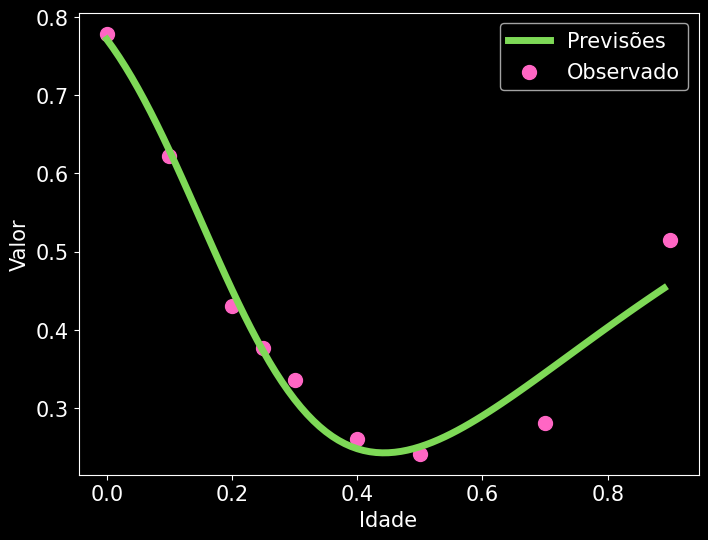

In [44]:
plt.plot(x_range, saida_numpy, color=colors['verde'], lw=5, label = 'Previsões')
plt.scatter(x, y, color=colors['rosa'], marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [49]:
model.forward(torch.FloatTensor([0.40]))

tensor([0.2547], grad_fn=<ViewBackward0>)